In [68]:
import csv
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt
from pywt import wavedec

In [69]:
# dataset_path = "data/training/"

In [70]:
# header = 'filename'
# for i in range(1, 41):
#   header += f' mfcc{i}'
# header += ' label'
# header = header.split()

In [71]:
# file = open('data_1.csv', 'w', newline='')
# with file:
#   writer = csv.writer(file)
#   writer.writerow(header)

# for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
#         # ensure we're processing a genre sub-folder level
#         if dirpath is not dataset_path:
#           semantic_label = dirpath.split("/")[-1]
#           print("\nProcessing: {}".format(semantic_label))
#           for f in filenames:
#               file_path = os.path.join(dirpath, f)
#               to_append = f'{file_path}'
#               # print(file_path)
#               y, sr = librosa.load(file_path, mono=True, duration=3, sr=8000)
#               mfcc = librosa.feature.mfcc(y=y, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
#               for e in mfcc:
#                   to_append += f' {np.mean(e.T, axis=0)}'
#               to_append += f' {semantic_label}'
#               file = open('data_1.csv', 'a', newline='')
#               with file:
#                   writer = csv.writer(file)
#                   writer.writerow(to_append.split())

In [72]:
# data = pd.read_csv('../data_mfccRMScqt.csv')
data = pd.read_csv('../Preprocessing/test/db1/data_MfccDwtChromaCqtdb1L1.csv')
data.head()


,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/DWT_NEW/MVP/New_MVP_062.wav,-378.466705,70.777046,-15.043975,-10.483999,-7.787292,-10.019837,-10.438225,-10.765308,-11.529624,...,0.004576,0.007013,0.009191,0.009871,0.007580,0.004856,0.004364,0.004430,0.003150,MVP
1,../data/DWT_NEW/MVP/New_MVP_109.wav,-319.873901,86.987167,-4.425532,-24.986303,-16.058350,-17.620874,-21.183941,-13.546381,-13.906720,...,0.006113,0.007374,0.003911,0.004396,0.006237,0.002841,0.003259,0.001627,0.001817,MVP
2,../data/DWT_NEW/MVP/New_MVP_009.wav,-436.392487,96.536903,15.220769,-3.666383,-7.341067,-16.075756,-19.296213,-12.426279,-12.215953,...,0.001060,0.001288,0.002036,0.002741,0.003057,0.002324,0.001372,0.001019,0.001093,MVP
3,../data/DWT_NEW/MVP/New_MVP_177.wav,-260.900574,82.395615,-14.294676,-40.442722,-28.068470,-14.434702,-11.098033,-15.608220,-18.183039,...,0.040846,0.037475,0.030191,0.031350,0.024266,0.023387,0.018028,0.016594,0.014518,MVP
4,../data/DWT_NEW/MVP/New_MVP_069.wav,-437.852600,95.676224,9.383162,-12.113409,-9.554273,-10.383272,-10.062037,-8.767884,-12.414495,...,0.002557,0.003386,0.003017,0.003608,0.003812,0.002936,0.002787,0.003399,0.002704,MVP


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Columns: 114 entries, filename to label
dtypes: float64(112), object(2)
memory usage: 801.7+ KB


In [74]:
# scaler = StandardScaler()
X = data.drop(['label', 'filename'], axis=1)
# X = scaler.fit_transform(X)
# X = np.reshape(X, (-1, X.shape[0], X.shape[1], 1))
y = data.iloc[:, -1]

In [75]:
X.shape

(900, 112)

In [76]:
y.head()

0    MVP
1    MVP
2    MVP
3    MVP
4    MVP
Name: label, dtype: object

In [77]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
0,-378.466705,70.777046,-15.043975,-10.483999,-7.787292,-10.019837,-10.438225,-10.765308,-11.529624,-6.286917,...,0.003381,0.004576,0.007013,0.009191,0.009871,0.007580,0.004856,0.004364,0.004430,0.003150
1,-319.873901,86.987167,-4.425532,-24.986303,-16.058350,-17.620874,-21.183941,-13.546381,-13.906720,-13.717781,...,0.007207,0.006113,0.007374,0.003911,0.004396,0.006237,0.002841,0.003259,0.001627,0.001817
2,-436.392487,96.536903,15.220769,-3.666383,-7.341067,-16.075756,-19.296213,-12.426279,-12.215953,-12.313032,...,0.001414,0.001060,0.001288,0.002036,0.002741,0.003057,0.002324,0.001372,0.001019,0.001093
3,-260.900574,82.395615,-14.294676,-40.442722,-28.068470,-14.434702,-11.098033,-15.608220,-18.183039,-11.157784,...,0.043850,0.040846,0.037475,0.030191,0.031350,0.024266,0.023387,0.018028,0.016594,0.014518
4,-437.852600,95.676224,9.383162,-12.113409,-9.554273,-10.383272,-10.062037,-8.767884,-12.414495,-6.307548,...,0.002647,0.002557,0.003386,0.003017,0.003608,0.003812,0.002936,0.002787,0.003399,0.002704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-339.158112,40.213173,-36.526974,-53.637939,-18.601725,-12.249957,-10.941161,-9.111422,-10.798549,-5.611834,...,0.035250,0.040663,0.033821,0.044480,0.047381,0.049833,0.045619,0.043067,0.030173,0.025898
896,-501.082001,89.517166,25.677994,-4.297906,-10.959665,-17.939556,-20.772755,-15.514157,-15.844445,-12.956374,...,0.005172,0.003850,0.002997,0.001923,0.001676,0.001316,0.000971,0.000981,0.001023,0.000886
897,-307.757050,51.899139,-23.147026,-28.208418,-22.437355,-13.074753,-12.573600,-9.405491,-10.770848,-8.731351,...,0.032781,0.027149,0.027509,0.045420,0.052697,0.049330,0.044515,0.036902,0.025493,0.022228
898,-334.683624,87.311577,6.389525,-1.465219,-13.921110,-18.471697,-14.806891,-16.474894,-18.158365,-17.774797,...,0.008435,0.009755,0.009753,0.007868,0.007349,0.005529,0.002896,0.002681,0.003235,0.002716


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
y_test.shape

(180,)

In [80]:
X_train.shape

(720, 112)

In [81]:
X_train

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
10,-385.906982,74.895340,39.821186,-8.971136,-22.192118,-25.015581,-27.064453,-24.045132,-27.759182,-29.726229,...,0.002294,0.001526,0.002158,0.002329,0.002317,0.001506,0.001128,0.000906,0.000822,0.000770
334,-415.968506,107.517372,44.947140,-2.356348,-16.818644,-22.711168,-24.376642,-19.630342,-19.142199,-15.471057,...,0.003029,0.002132,0.001797,0.001642,0.001062,0.001127,0.000976,0.000559,0.000708,0.000717
244,-427.811066,102.884872,46.127216,6.943640,-10.577306,-21.495943,-30.066357,-20.540812,-12.175126,-10.055816,...,0.004527,0.003815,0.002654,0.001473,0.000573,0.000913,0.000984,0.000708,0.000538,0.000361
678,-358.147736,95.750092,-6.823721,-38.393955,-33.172913,-28.448936,-25.357052,-24.172688,-21.519249,-16.292105,...,0.014000,0.014028,0.014584,0.016448,0.011797,0.013386,0.011898,0.007499,0.006875,0.006322
306,-427.476135,98.611679,36.363655,-0.854163,-14.472300,-24.841476,-19.455835,-19.234936,-19.875013,-20.455000,...,0.002225,0.001244,0.001890,0.001335,0.001256,0.001930,0.001312,0.000906,0.001056,0.000961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-397.429016,77.593384,24.298113,-15.595834,-26.727154,-24.668875,-24.234287,-23.968037,-30.278244,-33.223251,...,0.004297,0.004133,0.005123,0.007229,0.008914,0.008600,0.005154,0.001585,0.001324,0.000832
270,-410.292542,98.300247,44.424370,5.566563,-9.317470,-21.559860,-24.616989,-15.818483,-16.259008,-13.159559,...,0.003473,0.003598,0.002932,0.001842,0.001216,0.000991,0.001201,0.001271,0.000916,0.000585
860,-408.968292,94.780281,24.131092,-8.054283,-17.265577,-19.051916,-18.081953,-19.145655,-21.355644,-19.833616,...,0.006677,0.006362,0.006968,0.005794,0.005023,0.004618,0.003270,0.002189,0.001938,0.001347
435,-383.255219,73.887856,3.322746,-1.166246,-1.575055,-1.824785,-8.054250,-10.752819,-6.060513,-11.980646,...,0.001899,0.001540,0.001212,0.001930,0.003594,0.004990,0.003905,0.001831,0.001534,0.001580


In [82]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)



(180,)
(720, 112, 1)
(180, 112, 1)


In [83]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [84]:
# X_train.shape
# X_test.shape
X_test.shape

(180, 112, 1, 1)

In [85]:
def build_model():
    model = models.Sequential(
        [
            layers.Conv1D(64, (3), activation="relu", input_shape=(X_train.shape[1], X_train.shape[2])),
            layers.MaxPooling1D((3), strides=(2), padding="same"),

            layers.Conv1D(32, (3) , activation="relu"),
            layers.MaxPooling1D((3), strides=(2), padding="same"),

            layers.Flatten(),
            layers.Dense(64, activation="relu"),
            layers.Dense(5, activation="softmax"),

            # layers.Conv1D(64, (3), activation="relu", input_shape=(X_train.shape[1], X_train.shape[2])),
            # layers.MaxPooling1D((3), strides=(2), padding="same"),

            # layers.Conv1D(32, (3) , activation="relu"),
            # layers.MaxPooling1D((3), strides=(2), padding="same"),

            # layers.Flatten(),
            # layers.Dense(64, activation="relu", activity_regularizer=tf.keras.regularizers.l2(1e-4)),
            # layers.Dense(5, activation="softmax"),
        ]
    )

    return model

In [86]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 110, 64)           256       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 55, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 53, 32)            6176      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 27, 32)            0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 864)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [87]:
optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))
# history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50


12/12 [==============================] - 1s 24ms/step - loss: 1.9955 - acc: 0.3042 - val_loss: 1.6116 - val_acc: 0.2389
Epoch 2/50
12/12 [==============================] - 0s 9ms/step - loss: 1.4843 - acc: 0.4139 - val_loss: 1.3809 - val_acc: 0.5722
Epoch 3/50
12/12 [==============================] - 0s 8ms/step - loss: 1.2985 - acc: 0.6264 - val_loss: 1.2452 - val_acc: 0.6611
Epoch 4/50
12/12 [==============================] - 0s 9ms/step - loss: 1.1664 - acc: 0.6764 - val_loss: 1.1374 - val_acc: 0.6556
Epoch 5/50
12/12 [==============================] - 0s 13ms/step - loss: 1.0786 - acc: 0.6736 - val_loss: 1.0537 - val_acc: 0.6333
Epoch 6/50
12/12 [==============================] - 0s 11ms/step - loss: 1.0103 - acc: 0.6833 - val_loss: 0.9898 - val_acc: 0.6778
Epoch 7/50
12/12 [==============================] - 0s 9ms/step - loss: 0.9547 - acc: 0.7153 - val_loss: 0.9310 - val_acc: 0.7167
Epoch 8/50
12/12 [==============================] - 0s 9ms/step - loss: 0.8922 - acc: 0.7444 - val

6/6 [==============================] - 0s 4ms/step - loss: 0.2540 - acc: 0.9389
Accuracy on test set is: 0.9388889074325562


Text(0, 0.5, 'Accuracy')

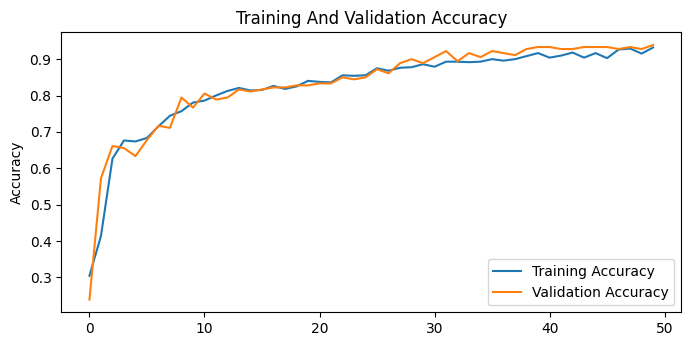

In [88]:
# evaluate model on test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))


# plot accuracy/error for training and validation
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.title('Training And Validation Accuracy')
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')

# model.save('../modelh5/model_cnn_tuning.h5')

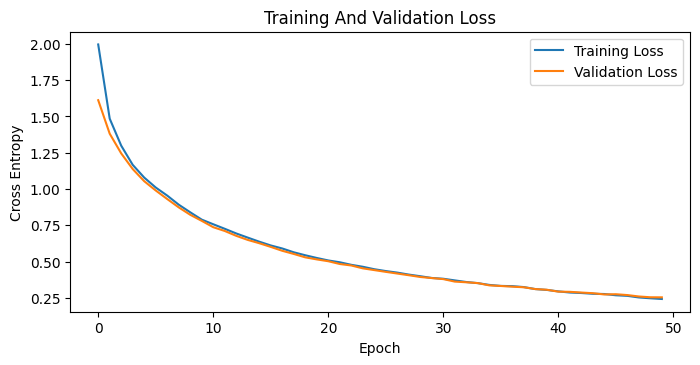

In [89]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.title('Training And Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.show()


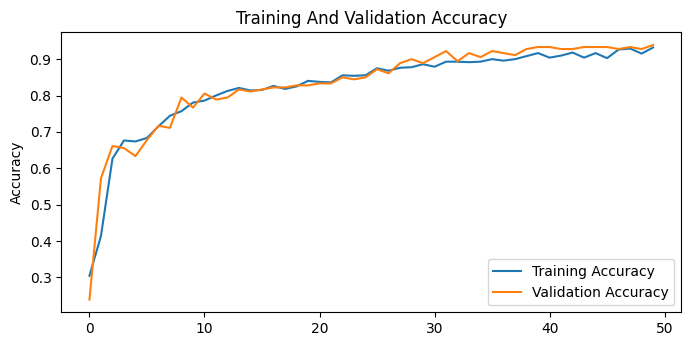

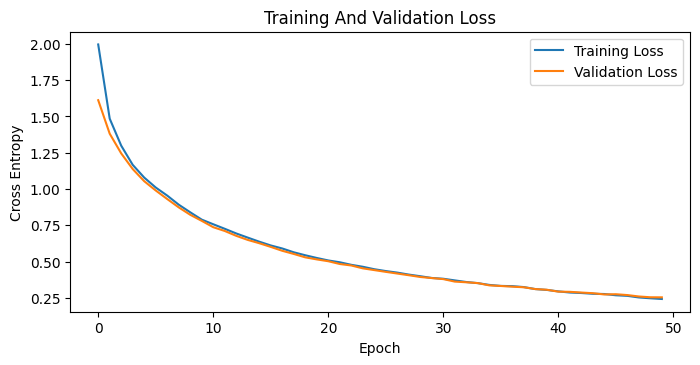

In [90]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.title('Training And Validation Accuracy')
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.title('Training And Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')   
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.show()

In [91]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
y_p = np.argmax(y_pred, axis=1)
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_p)
cm

6/6 [==============================] - 0s 3ms/step


array([[32,  2,  0,  1,  0],
       [ 0, 31,  0,  0,  0],
       [ 0,  2, 34,  1,  1],
       [ 1,  2,  0, 31,  1],
       [ 0,  0,  0,  0, 41]])

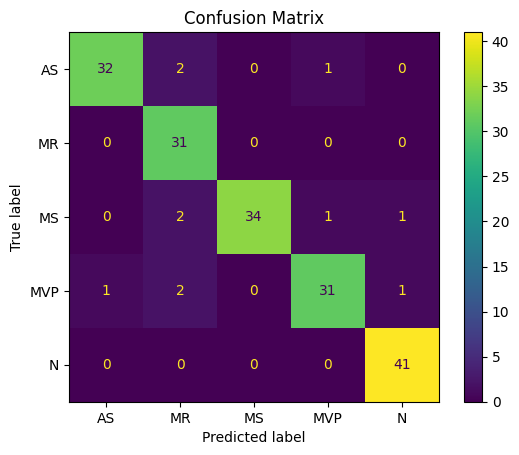

In [92]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AS', 'MR', 'MS', 'MVP', 'N'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [93]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [94]:
print("TNR : ", TNR)
print("TPR : ", TPR)
print("FPR : ", FPR)
print("FNR : ", FNR)
print("ACC : ", ACC)
print("PPV : ", PPV)
print("NPV : ", NPV)

TNR :  [0.99310345 0.95973154 1.         0.9862069  0.98561151]
TPR :  [0.91428571 1.         0.89473684 0.88571429 1.        ]
FPR :  [0.00689655 0.04026846 0.         0.0137931  0.01438849]
FNR :  [0.08571429 0.         0.10526316 0.11428571 0.        ]
ACC :  [0.97777778 0.96666667 0.97777778 0.96666667 0.98888889]
PPV :  [0.96969697 0.83783784 1.         0.93939394 0.95348837]
NPV :  [0.97959184 1.         0.97260274 0.97278912 1.        ]


In [95]:
# specificity AS
# TN / (TN + FP)
# spe = 


In [96]:
# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        35
           1       0.84      1.00      0.91        31
           2       1.00      0.89      0.94        38
           3       0.94      0.89      0.91        35
           4       0.95      1.00      0.98        41

    accuracy                           0.94       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.94      0.94      0.94       180



### Testing

In [97]:
model_uri = '../modelh5/model_cnn_tuning.h5'
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 110, 64)           256       
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 55, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 53, 32)            6176      
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 27, 32)            0         
 g1D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 864)               0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [98]:
import wave
import json
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
for i in range(1, 13):
  header += f' chroma{i}'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()


def extract_mfcc(audiofile):
    file = open('test.csv', 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    coeffs = wavedec(y, 'db1', level=10)
    cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD1, cD1 = coeffs
    mfcc = librosa.feature.mfcc(y=cD1, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    rms = librosa.feature.chroma_stft(y=cD1, sr=8000)
    cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60))
    combined_features = np.concatenate((mfcc, rms, cqt), axis=0)
    to_append = f'Signal'
    for e in combined_features:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predict(audio):
    model = tf.keras.models.load_model(model_uri)
    extract_mfcc(audio)
    data = pd.read_csv('test.csv')
    scaler = StandardScaler()
    df = data.drop(['label', 'filename'], axis=1)
    pred = model.predict(df)
    class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
    cek = np.argmax(pred[0])
    # print(pred[0])
    # print(cek)
    print("=====")
    print(audio)
    print(f'Predicted class: {class_labels[cek]}')
    print("=====")

predict('../data/testing_10/MVP/New_MVP_033.wav')


1/1 [==============================] - 0s 110ms/step
=====
../data/testing_10/MVP/New_MVP_033.wav
Predicted class: MVP
=====


In [99]:
dataset_path = '../data/testing_10/'
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:
            semantic_label = dirpath.split("/")[-1]
            print("\nProcessing: {}".format(semantic_label))
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                predict(file_path)


Processing: MVP
1/1 [==============================] - 0s 140ms/step
=====
../data/testing_10/MVP/New_MVP_135.wav
Predicted class: MVP
=====
1/1 [==============================] - 0s 106ms/step


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=441
  warnings.warn(


=====
../data/testing_10/MVP/New_MVP_192.wav
Predicted class: MVP
=====
1/1 [==============================] - 0s 118ms/step
=====
../data/testing_10/MVP/New_MVP_179.wav
Predicted class: MVP
=====
1/1 [==============================] - 0s 107ms/step
=====
../data/testing_10/MVP/New_MVP_165.wav
Predicted class: MVP
=====
1/1 [==============================] - 0s 126ms/step
=====
../data/testing_10/MVP/New_MVP_024.wav
Predicted class: MVP
=====
1/1 [==============================] - 0s 110ms/step
=====
../data/testing_10/MVP/New_MVP_129.wav
Predicted class: MVP
=====
1/1 [==============================] - 0s 106ms/step
=====
../data/testing_10/MVP/New_MVP_067.wav
Predicted class: MVP
=====
1/1 [==============================] - 0s 102ms/step
=====
../data/testing_10/MVP/New_MVP_164.wav
Predicted class: MVP
=====
1/1 [==============================] - 0s 115ms/step
=====
../data/testing_10/MVP/New_MVP_010.wav
Predicted class: MVP
=====
1/1 [==============================] - 0s 218ms/step


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=444
  warnings.warn(


1/1 [==============================] - 0s 149ms/step
=====
../data/testing_10/MVP/New_MVP_100.wav
Predicted class: MVP
=====


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=504
  warnings.warn(


1/1 [==============================] - 0s 159ms/step
=====
../data/testing_10/MVP/New_MVP_124.wav
Predicted class: MVP
=====
1/1 [==============================] - 0s 142ms/step
=====
../data/testing_10/MVP/New_MVP_045.wav
Predicted class: MVP
=====

Processing: MS
1/1 [==============================] - 0s 125ms/step
=====
../data/testing_10/MS/New_MS_136.wav
Predicted class: MS
=====
1/1 [==============================] - 0s 123ms/step


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=500
  warnings.warn(


=====
../data/testing_10/MS/New_MS_030.wav
Predicted class: MS
=====
1/1 [==============================] - 0s 129ms/step
=====
../data/testing_10/MS/New_MS_114.wav
Predicted class: MS
=====
1/1 [==============================] - 0s 113ms/step
=====
../data/testing_10/MS/New_MS_169.wav
Predicted class: MS
=====
1/1 [==============================] - 0s 128ms/step


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=505
  warnings.warn(


=====
../data/testing_10/MS/New_MS_187.wav
Predicted class: MS
=====
1/1 [==============================] - 0s 125ms/step
=====
../data/testing_10/MS/New_MS_138.wav
Predicted class: MS
=====
1/1 [==============================] - 0s 142ms/step
=====
../data/testing_10/MS/New_MS_158.wav
Predicted class: MS
=====
1/1 [==============================] - 0s 110ms/step
=====
../data/testing_10/MS/New_MS_188.wav
Predicted class: MS
=====
1/1 [==============================] - 0s 115ms/step
=====
../data/testing_10/MS/New_MS_171.wav
Predicted class: AS
=====
1/1 [==============================] - 0s 126ms/step
=====
../data/testing_10/MS/New_MS_052.wav
Predicted class: MS
=====
1/1 [==============================] - 0s 137ms/step
=====
../data/testing_10/MS/New_MS_054.wav
Predicted class: MS
=====
1/1 [==============================] - 0s 143ms/step
=====
../data/testing_10/MS/New_MS_095.wav
Predicted class: MS
=====


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=367
  warnings.warn(


1/1 [==============================] - 0s 138ms/step
=====
../data/testing_10/MS/New_MS_011.wav
Predicted class: AS
=====
1/1 [==============================] - 0s 119ms/step
=====
../data/testing_10/MS/New_MS_032.wav
Predicted class: MS
=====
1/1 [==============================] - 0s 132ms/step
=====
../data/testing_10/MS/New_MS_087.wav
Predicted class: MR
=====
1/1 [==============================] - 0s 126ms/step
=====
../data/testing_10/MS/New_MS_150.wav
Predicted class: MS
=====


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=330
  warnings.warn(


1/1 [==============================] - 0s 139ms/step
=====
../data/testing_10/MS/New_MS_009.wav
Predicted class: AS
=====
1/1 [==============================] - 0s 97ms/step
=====
../data/testing_10/MS/New_MS_066.wav
Predicted class: MS
=====
1/1 [==============================] - 0s 116ms/step
=====
../data/testing_10/MS/New_MS_116.wav
Predicted class: MS
=====
1/1 [==============================] - 0s 102ms/step
=====
../data/testing_10/MS/New_MS_075.wav
Predicted class: MS
=====

Processing: N
1/1 [==============================] - 0s 100ms/step
=====
../data/testing_10/N/New_N_131.wav
Predicted class: N
=====
1/1 [==============================] - 0s 101ms/step
=====
../data/testing_10/N/New_N_017.wav
Predicted class: N
=====
1/1 [==============================] - 0s 114ms/step
=====
../data/testing_10/N/New_N_009.wav
Predicted class: N
=====
1/1 [==============================] - 0s 94ms/step
=====
../data/testing_10/N/New_N_172.wav
Predicted class: N
=====
1/1 [==================

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=488
  warnings.warn(


=====
../data/testing_10/MR/New_MR_019.wav
Predicted class: AS
=====
1/1 [==============================] - 0s 111ms/step
=====
../data/testing_10/MR/New_MR_061.wav
Predicted class: MR
=====
1/1 [==============================] - 0s 92ms/step
=====
../data/testing_10/MR/New_MR_083.wav
Predicted class: AS
=====
1/1 [==============================] - 0s 115ms/step
=====
../data/testing_10/MR/New_MR_145.wav
Predicted class: MR
=====
1/1 [==============================] - 0s 98ms/step
=====
../data/testing_10/MR/New_MR_110.wav
Predicted class: MR
=====
1/1 [==============================] - 0s 95ms/step
=====
../data/testing_10/MR/New_MR_067.wav
Predicted class: MR
=====
1/1 [==============================] - 0s 107ms/step
=====
../data/testing_10/MR/New_MR_157.wav
Predicted class: MR
=====
1/1 [==============================] - 0s 89ms/step
=====
../data/testing_10/MR/New_MR_180.wav
Predicted class: MR
=====
1/1 [==============================] - 0s 88ms/step
=====
../data/testing_10/MR/N